# Iterative Prisoner's Dilemma

## Description

The Iterative Prisoner Dilemma (IPD) is the advanced version of the Prisoner Dilemma, a well known problem in Game Theory, where two partecipants, A and B, are given the choice to **cooperate** or **defect** and depending on their answers, they are awarded points based on 4 integer parameters $R,S,T,P$, with the conditions $$T>R>P>S; \quad 2R > T+S$$<br> For the purposes of this discussion, we set them at respectively $3, 0, 5, 1$.<br>
If A and B cooperate they both get R points, while if they 'betray' each other they get P points. If one player defects while the other cooperate, the former gets T points while the latter gets S points.<br>
The results of a 'competition' are shown in the table below.
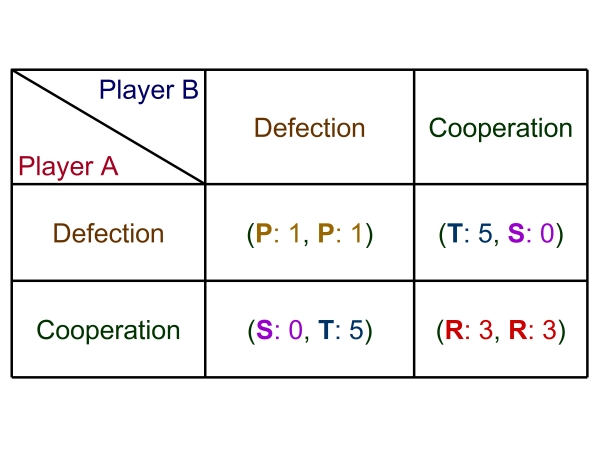
For this first problem, it's obvious that the optimal choice is to defect, since it grants the most points for any choice your opponent makes.<br>
The PD can be evolved by making the partecipants choose again and again in an iterative process, and this opens many possibilities regarding strategies that the partacipants may implement, depending from their opponent's previous moves or a particular behaviour they want to reflect.

## Project's aims

In this work we study the behaviour of many different strategies, grouped in different possible configurations, with the aim of understanding the best approaches to the IPD based on the conditions in which the partecipants have to compete. For instance, some "**bad**" strategies wield better results when confronting a large number of "cooperative" strategies (**nice** strategies) while others are optimal when it comes to oppose those bad strategies.

## Project's structure

This project is structured as follow:
* **Point one - Fight 1 vs 1**: development of a method to implement a single IPD problem, between two chosen strategies which "fight" and score points based on the payoff parameters.
* **Point Two - All vs all**: by implementing a round-robin scheme, where each strategy competes against all the others, the general behaviour of each strategy can be studied to observe the best performing one in a single fight.
* **Point Three - Population evolution**: study the efficiency of every strategy in a "long-term" conflict by iterating the fights *all vs all* and evolving the population of the partecipants at each iteration by "killing" the worst performing ones and increasing the numbers of the "winning" ones.
* **Point Four - Mutations**: repetition of the previous process but giving the strategies a probability to mutate at each iteration, with a gene that encodes the  possibility for a partecipant to collaborate independently from his strategy.

### Libraries and imported files

In the following cell we present the libraries imported.<br>
In order to simplify and streamline the main project, we have defined the functions that compute the various tasks requested in different *python* files:
* `it_pris_dil_func.py` for the functions that implement the various competitions methods.
* `strategies.py` for the functions that define the strategies implemented (imported inside `it_pris_dil_func.py`).
* `update_func.py` for the functions that evolve the population after different iterations of a tournment (imported inside `it_pris_dil_func.py`).
* `graph_func.py` for the functions that create the graphic representations of the results.

In [ ]:
import numpy as np
import numpy.random as npr
import pandas as pd
from IPython.display import display
import it_pris_dil_func as pris_dil
import graph_func as grf

### Strategies implemented

* **Nice guy**: always cooperates
* **Bad guy**: always defects 
* **Mainly nice**: randomly defects $k\%$ of the times and cooperates $100-k\%$, for this project we chose $k = 30$
* **Mainly bad**: randomly defects $k\%$ of the times and cooperates $100-k\%$, for this project we chose $k = 30$
* **Tit-for-tat**: starts by cooperating, then repeats what the opponent has done in the previous move
* **Random**:cooperates or defects randomly
* **Grim**: starts by cooperating, but if the opponent defects one time, it'll always defect
* **Forgiving Tit-Tat**: starts by cooperating, then repeats what the opponent has done in the previous move, but defects only if the opponent defects for two consecutive rounds
* **Suspicious Tit-Tat**: starts by defecting, then repeats what the opponent has done in the previous move
* **Pavlov**: cooperates if in the previous round he and the opponent had done the same move, otherwise defects 
* **Reactive Nice**: in the first round cooperates $50\%$ of the times, then cooperates with probability $p$ if the opponent cooperated in  the previous round, and with probability $q$ if the opponent defected. In this case the probability values $p$ and $q$ were set respectively at $0.7$ and $0.3$
* **Reactive Bad**: same strategy as the previous one, but with set values $p$ and $q$ respectively $0.3$ and $0.7$
* **Hard Joss**: plays like Tit-for-Tat, but cooperates only with probability $0.9$
* **Soft Joss**: plays like Tit-for-Tat, but defects only with probability $0.9$

As input variables we have:
* `it`: current iteration (round) of the 1vs1 fight
* `u`: opponent's move in the previous round
* `u2`: opponent's move two rounds before
* `v`: player's move in the previous round

Every strategy returns in output either:
* $u_c = (1,0)$ which corresponds to collaborating in the current iteration
* $u_d = (0,1)$ which corresponds to defecting

In [ ]:
uc, ud = [1,0], [0,1]
k=0.3

def nice_guy(it,u,v,u2):
    return uc

def bad_guy(it,u,v,u2):
    return ud

def mainly_nice(it,u,v,u2):
    a = npr.rand()
    if a > k: return uc
    else: return ud
    
def mainly_bad(it,u,v,u2):
    a = npr.rand()
    if a <= k: return uc
    else: return ud
    
def tit_tat(it,u,v,u2):
    if it==2: return uc
    else: return u
    
def random(it,u,v,u2):
    a = npr.rand()
    if a < 0.5: return uc
    else: return ud
    
def pavlov(it,u,v,u2):
    if it==2:
        return uc
    else:
        if v == ud:
            return ud
        else:
            if u == ud:
                return ud
            else: return uc

def f_tit_tat(it,u,v,u2):
    if it <= 3: return uc
    else:
        if u == ud and u2 == ud:
            return ud
        else: return uc
        
def sus_tit_tat(it,u,v,u2):
    if it==2: return ud
    else: return u
    
def pavlov(it,u,v,u2):
    if u == v: return uc
    else: return ud
    
def reactive_nice(it,u,v,u2):
    y = 0.5
    p = 0.7
    if it == 2:
        if npr.random() <= y: return uc
        else: return ud
    else:
        if u == uc:
            if npr.random() <= p: return uc
            else: return ud
        else:
            if npr.random() <= 1-p: return uc
            else: return ud
    
def reactive_bad(it,u,v,u2):
    y = 0.5
    p = 0.3
    if it == 2:
        if npr.random() <= y: return uc
        else: return ud
    else:
        if u == uc:
            if npr.random() <= p: return uc
            else: return ud
        else:
            if npr.random() <= 1-p: return uc
            else: return ud 
            
def hard_joss(it,u,v,u2):
    p = 0.9
    if it==2: return uc
    else:
        if u == uc:
            if npr.random() <= p: return uc
            else: return ud
        else: return ud
        
def soft_joss(it,u,v,u2):
    p = 0.9
    if it==2: return uc
    else:
        if u == ud:
            if npr.random() <= p: return ud
            else: return uc
        else: return uc

### Strategy dictionary: strat

The dictionary `strat` helps to recall a particular strategy when needs arise, even inside a `for` cycle by using the method `partial` from the library `functools`, which allows to associate a string with the name of the strategy with the corresponding function.

In [ ]:
strat = {'nice': partial(st.nice_guy),
        'bad': partial(st.bad_guy), 
        'm_nice': partial(st.mainly_nice),tring
        'm_bad': partial(st.mainly_bad),
        'tit_tat': partial(st.tit_tat),
        'random': partial(st.random),
        'grim': partial(st.grim),
        'f_tit_tat': partial(st.f_tit_tat),
        'sus_tit_tat': partial(st.sus_tit_tat),
        'pavlov': partial(st.pavlov),
        'reactive_nice': partial(st.reactive_nice),
        'reactive_bad': partial(st.reactive_bad),
        'hard_joss': partial(st.hard_joss),
        'soft_joss': partial(st.soft_joss)}

## Point 1: IPD between two players

In this first part we want to implement a iterated prisoner's dilemma implementing two given strategies.

### 1vs1 Fight function

To study the results of a contention between two given strategy we implemented the `fight()` function, which does the following:
* takes in **input** the strings representing two strategies, and eventually the number of times we want them to confront in the same *battle* (default is 100).
* computes the answers of each strategy in a cycle and appends them in the vectors `p1` and `p2`.
* computes two vectors, `result_1` and `result_2`, containing the score made by each contendent at each iteration $i$, $r_{1,i}$ and $r_{2,i}$, by taking the dot product of their decisions with a matrix $M$:
$$
r_{1,i} = u_{1,i}^T M u_{2,i}
\quad
\quad
r_{2,i} = u_{2,i}^T M u_{1,i}
$$

&emsp;&emsp;where $M$ is defined as:
$$
M = 
\begin{pmatrix} 
R & S \\
T & P 
\end{pmatrix}
$$
* **returns** the final score of each contendent by taking the *cumulative sum* of `result_1` and `result_2`

In [ ]:
def fight(player1,player2,N=None):

    if N == None: N = 100
            
    R, S, T, P = 3, 0, 5, 1
    M = np.array([[R,S],[T,P]])

    p1, p2 = [-1,-1], [-1,-1]
    for i in range(2,N+2):
        p1.append(strat[player1](i,p2[i-1],p1[i-1],p2[i-2]))
        p2.append(strat[player2](i,p1[i-1],p2[i-1],p1[i-2]))

    p1 = np.array(p1[2:]).T
    p2 = np.array(p2[2:]).T

    result_1 = np.cumsum([np.dot(p1[:,i].T,np.dot(M,p2[:,i])) for i in range(N)])
    result_2 = np.cumsum([np.dot(p2[:,i].T,np.dot(M,p1[:,i])) for i in range(N)])

    return result_1[-1], result_2[-1]

We use this function in a nested for loop in order to create the **result matrix**, containing the score of all the fights' combinations.

In [ ]:
s = ['nice','bad','m_nice','m_bad','tit_tat',
    'random','grim','f_tit_tat','sus_tit_tat',
    'pavlov','reactive_nice','reactive_bad',
    'hard_joss','soft_joss']

result = np.zeros((len(s),len(s)))
for i in range(len(s)):
    for j in range(i,len(s)):
        p1, p2 = pris_dil.fight(s[i],s[j])
        result[i,j] = p1
        result[j,i] = p2

We then insert the resulting matrix in a dataframe, where the cells represent the score obtained by the strategy in the row when confronting the strategy in the column. A green score means the strategy won, red means it lost while grey means a draw.<br>
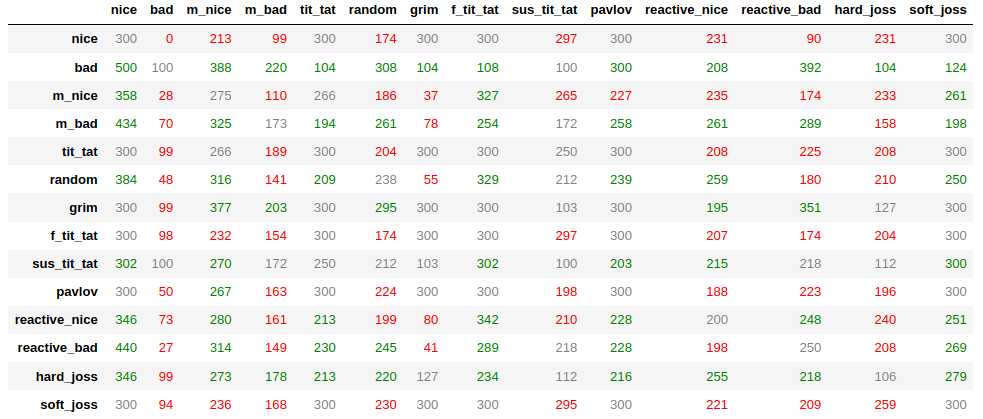

In the fight function we implemented the *boolean parameter* `graph`, which if set as `True` prints the graph representing the total score of the two contestants at each iteration.

In [ ]:
res1, res2 = pris_dil.fight('sus_tit_tat','soft_joss',N=100,graph=True)

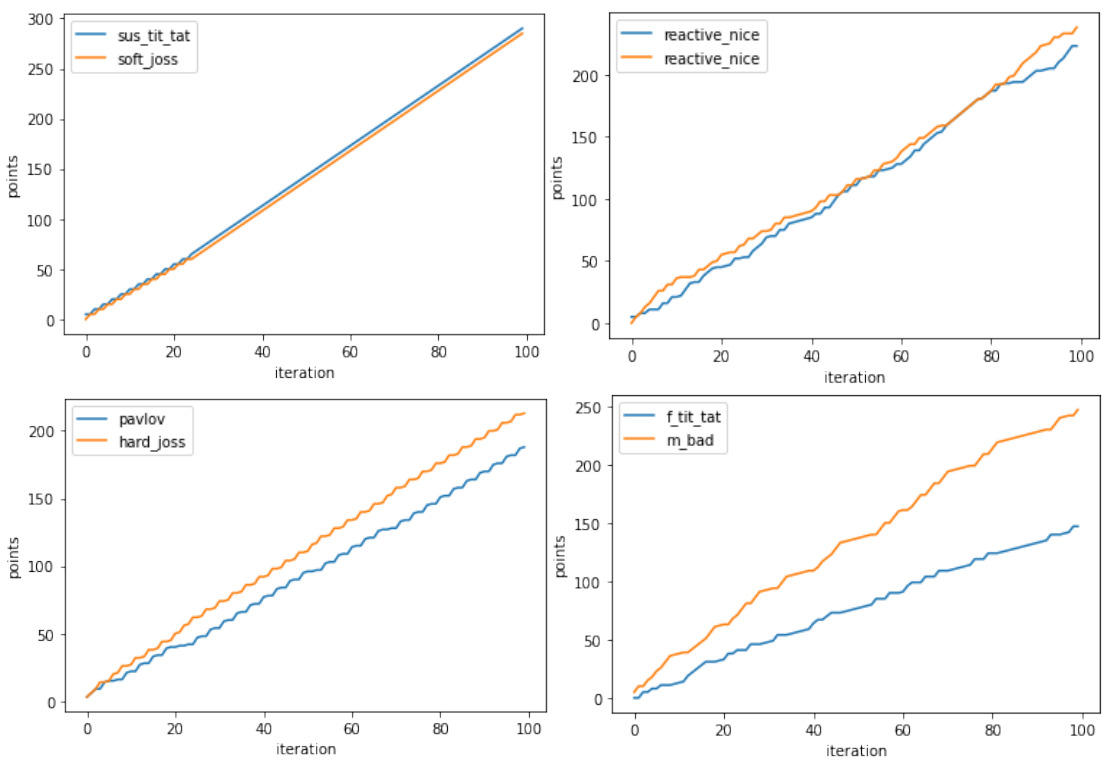
Another parameter implemented in `fight` returns the whole answer vectors, `p1` and `p2`, which can be used as parameters in the function `fight_grid` in the file `graph_func.py` to *zoom in* a particular range of iterations and observe the specific behaviour of the strategies in that range.

In [ ]:
res1, res2, p1, p2 = pris_dil.fight('sus_tit_tat','soft_joss',N=100,all_outcome=True)
grf.fight_grid(p1,p2,range=[10,30])

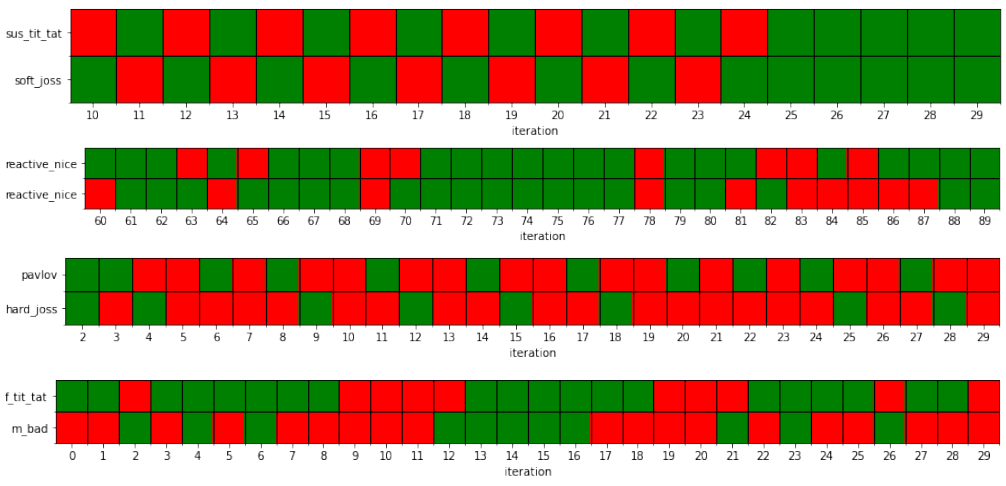

We can see how the best performing strategies in this simple *1vs1* confrontations are the most "aggressive" ones, *e.g.* bad, which can only get a win or a draw, but never a loss.

## Point 2: Multiple Players IPD - MPIPD

For this second task, we want to build a vector, called `h`, which contains all the partecipants in this *round robin* confrontation. Each partecipant, represented by a cell in `h`, must implement one of the strategies chosen from the string vector `s`, encoded by an integer which is the position in `s` of the corresponding strategy.
`h` could be either generated randomly or specifically chosen, for this purposes we implemented the function `h_build` in `it_pris_dil_func.py` which takes in input a vector containing the population of each strategy and returns `h`.

In [ ]:
def h_build(numbers):
        h = []
        for i in range(len(numbers)):
            for j in range(numbers[i]):
                h.append(i)
        return np.array(h)

### Round Robin function

To compute the *all vs all* confrontations we implemented the function `round_robin` in `it_pris_dil_func.py` which operates as follows:
* takes in **input** the vectors `h` and `s`.
* computes the `result` matrix by recalling the `fight` function.
* builds the vector `mean` with the average score of the partecipants using the same strategy.
* **returns** the integer vector `unique` containing the strategies used by partecipants expressed by their numerical code, the vector `mean`, and the number of different strategies used.

In [ ]:
def round_robin(h,s, ord=False):

    N = len(h)
    partecipants = [s[int(i)] for i in h] 
    
    h = np.array(h)

    result = np.zeros((N,N))
    somma = np.zeros(N)
    for i in range(N):
        for j in range(i+1,N):
            p1, p2 = fight(partecipants[i],partecipants[j])
            result[i,j] = p1
            result[j,i] = p2

        somma[i] = np.sum(result[i,:])

    unique, n_strategies = np.unique(h,return_counts=True)
    mean = np.zeros(len(unique))

    for i in range(N):
        val = int(np.argwhere(unique == h[i]))
        mean[val] += somma[i]

    media = np.round(mean/n_strategies,2)
    
    if ord == True:
        sort = mean.argsort()
        mean = mean[sort]
        unique = unique[sort]
        n_strategies = n_strategies[sort]

    return unique, mean, n_strategies

We can then take `mean`, `unique`,`n_strat`,`s` and feed them to the function `graph_bar` in `graph_func.py` to plot `mean` as an hystogram, with the additional information of how many partecipants implement each strategy.</br>
For an hystogram where the bars are ordered according to their score it's possible to set the parameter `ord` in `round_robin` as `True`.

In [ ]:
s = ['nice','bad','m_nice','m_bad','tit_tat']
h = npr.randint(0,len(s),size=30)

unique, mean, n_strat = pris_dil.round_robin(h,s,ord=True)

grf.graph_bar(mean,unique,n_strat,s)



Starting from the first five strategies, we will show the RR score changes with different configurations of our vector `h`.
Firstly, we choose the same number for each strategy.

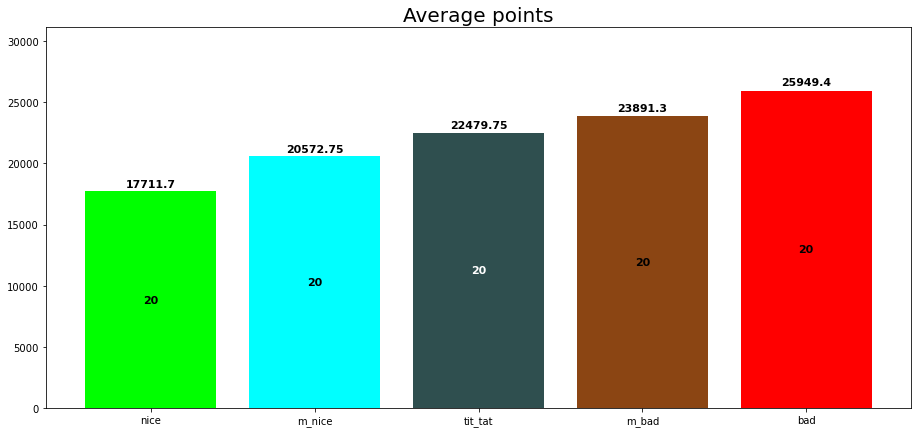

We can see that bad behavioral strategies (m_bad, bad) are the best as expected.
Looking at the percentual of nice, bad and neutral strategies, this graph represent, respectively, a 40%, 40%, 20% configuration.
If we try with the same percentual for each behavior we can see that bad strategies score decreases while the nice and neutral one increases. The presence of a higher number of tit tat favors nice and tit tat itself.    
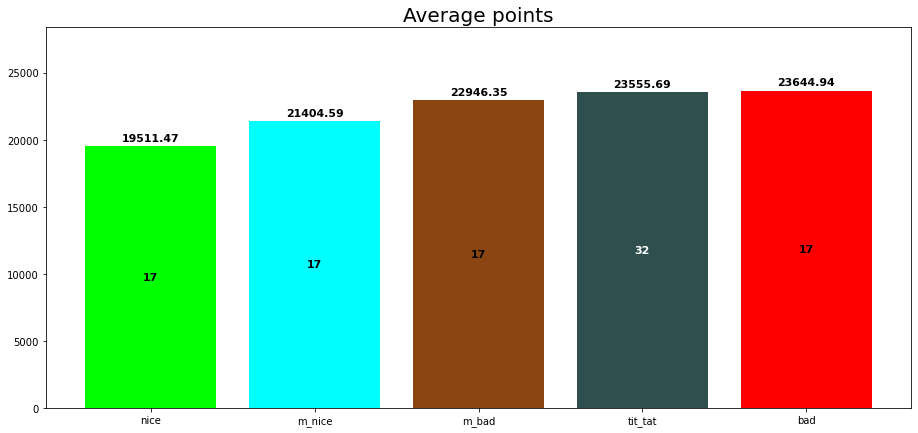

One may think that a higher number of nice strategies at the expense of bad ones would lead to a better perfomance for tit tat and nice but this isn't true as shown below.
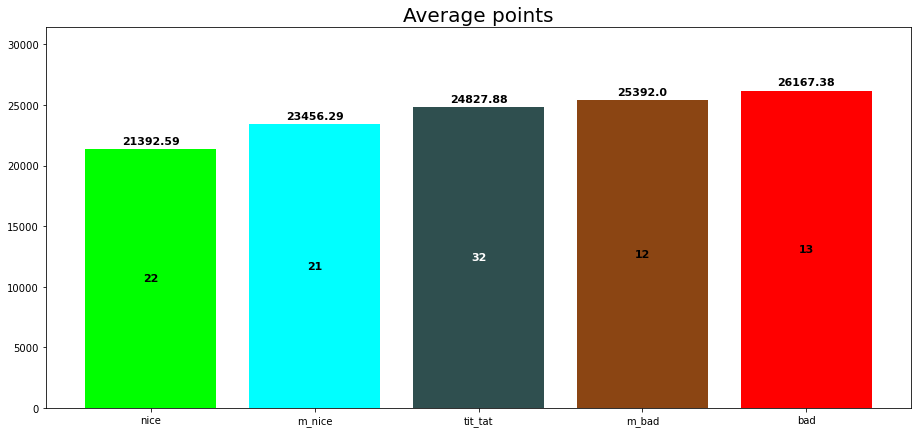

If we implement all the strategies, each with the same number of players, we have an interesting rearrangement that reflects the nature of the strategies implemented. Indeed, most of the new strategies are neutral or kind of tit tat. 
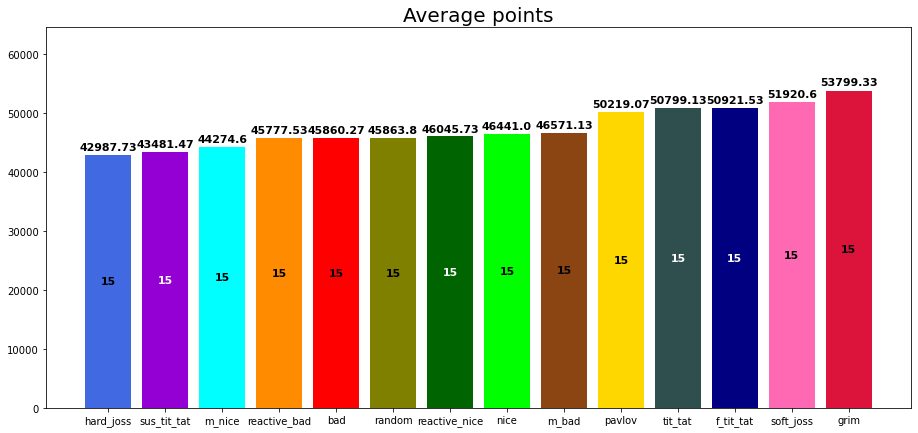

## Point 3: repeated MPIPD - rMPIPD
We now assume that, in a scenario where *round robin* is repeated a number of times, partecipants may choose to switch to a better performing strategy after realizing the inefficiency of their current one.
### Tournament function
This function resolves the task of iterating the *round robin* process for a set number of times, saving the results at each iteration and repopulating the partecipants vector `h`, according to different possible **update functions**, which we will go into later.
The function `tournament` acts as follows:
* takes in **input** the vector `h` of the partecipants, the chosen *update function*, vector `s` of the strategies, the number of iterations for the tournament `it` (default is 100) and `n_change` the number of *switches* we want at each iteration (default is 1)
* creates the matrices `n_matrix` (number of partecipants per strategy) and `val_matrix` (average score per strategy)

At each **iteration** $i$
* runs `round_robin` for the current `h`
* fills the $i$-th row of `n_matrix` with the number of partecipants implementig each strategy in that iteration of `round_robin`, sorted according to `s`
* fills the $i$-th row of `val_matrix` with the average scores of all partecipants implementing each strategy in `s` in that iteration of `round_robin`, sorted according to `s`
* if convergence is reached before the max number of iteration `it` is reached, the process stops
* **returns** `n_matrix` and `val_matrix`

In [ ]:
def tournament(h,update_f,s,it=None,n_change=None):
    
    if it == None: it = 100

    n_matrix = np.zeros([it,len(s)])  #matrix of the number of strategies at each iteration
    val_matrix = np.zeros([it,len(s)])  #matrix of the average scores at each iteration

    for i in range(it):    
        strategies, average_results, numbers = round_robin(h,s,ord=True)

        numbers_1 = np.zeros(len(n_matrix.T))
        average_1 = np.zeros(len(n_matrix.T))
        
        for j in range(len(strategies)):
            numbers_1[strategies[j]] = int(numbers[j])
            average_1[strategies[j]] = average_results[j]

        n_matrix[i] = numbers_1
        val_matrix[i] = average_1

        if len(np.unique(average_results)) == 1:
            count+=1
            if count == 1: tresh = i
            if count == int(tresh/10) + 3:
                break

        h, new_strat = update[update_f](h,strategies,average_results,s,s_ref,mutation_prob,n_change)

    n_matrix1 = np.copy(n_matrix[:i,:])
    val_matrix1 = np.copy(val_matrix[:i,:])

    return n_matrix, val_matrix, i

### Update functions
We developed a few possible methods to repopulate `h` at each iteration of `tournament`, then run some tests to select the most appropriate one.
The update functions were written inside the file `update_func.py`.
* `update_1`: reassign to each strategy a number of partecipants based on the percentage of their score w.r.t. the total score.

Since the vector with the strategies used in the tournament (`strat`) is sorted based on the score they achieved in the previous run of `round_robin`, the next methods differentiate just on how they select 2 strategies inside the vector `strat` (with indices `w1` and `w2`), after that is only necessary to find, inside of `h`, a partecipant implementing the strategy `strat[w1]` and reassigning him the strategy `strat[w2]`.

* `update_2`: `w1` and `w2` are selected randomly with a discrete uniform distribution over `strat`, the former in the first half of the vector (the *loosing end*) and the latter in the second half (*winning end*).

* `update_3`: `w1` and `w2` are selected by defining two linear **pdf** over the intervals $[0,len(strat)]$ and $[w1,len(strat)]$ respectively, and then extracting a random variable from each of them (*x1* and *x2*) through their **inverse cumulative distribution function** (**icdf**), defined as: $$L_{1,icdf} = l - l*\sqrt{1-x}$$ $$L_{2,icdf} = l*\sqrt{x}$$
where $l$ is the lenght of `strat`. We take `w1`$=int($*x1*$)$ and `w2`$=int($*x2*$)$

* `update_4`: `w1` is selected by assigning to each element of `strat` a probability that scales with its index. For example, for a vector composed of n strategies, the $i$-th element the probability vector is: $$p_i = \frac1{\sum_{x=1}^n{x}}*(i+1)$$
The probability vector is then flipped so that the probability is higher for the first element of `strat` and then goes decreasing. The same procedure is applied to select `w2` but only taking the strategies after `strat[w1]` and without flipping the probability vector

* `update_5`: this is the only function that assigns probabilities according to average scores and not only to the strategies position in `strat`, and so it's probably the most consistent with the task at hand.
The function acts on the vector of the scores `av` (which is sorted as well) and applies some transformations to it. To select `w1`the elements of `av` are first **shifted**
<img src="Images\up_5_1.png" width="700" height="200" />

The resulting vector is **flipped** and then divided by the **sum of its elements** to create probabilities normalized to 1

<img src="Images\up5_2fin.png" width="700" height="200" />

After that we take the **cumulative sum** to create a vector $p_C$ that encodes the cumulative probability for each function to be *switched out*

<img src="Images\up5_3.png" width="700" height="200" />

By generating a *random uniform variable x1* in the interval $[0,1]$ we can assign to `w1` the value of the index of the first element of $p_C$ which is bigger than *x1*.
`w2` is then selected in the same way, without **flipping** because we already have increasing probabilities and *slicing* `av` from `av[w1]` because we want the strategy to be *switched in* to be a better performing one

<img src="Images\up5_4.png" width="700" height="200" />
<img src="Images\up5_5.png" width="700" height="200" />

To choose an update function we fixed the vector h and run the algorithm for each one.
As shown below, the population changes in different ways. 

Update 1 | Update 2 | Update 3
:------------: | :----------: | :--------:
![](Images/punto3/1_33_pop_.png) | ![](Images\Punto3\2_33_pop_.png)| ![](Images\Punto3\4_33_pop_.png)

Update 4     |Update 5  |Legend 
:------------: | :----------:| :-------:
![](Images\Punto3\4_33_pop_.png) | ![](Images\Punto3\5_33_pop_.png)| ![](Images\Punto3\Legend.png)


### Simulations

After selecting `update_5` as the best update function, we can run the functions `graph_population` and `graph_average` in `graph_func.py`, setting the returns of `tournament` as parameters, to create graphics of the evolution of the population and the average scores along the tournament.

In [ ]:
s = ['nice','bad','m_nice','m_bad','tit_tat',
    'random','grim','f_tit_tat','sus_tit_tat',
    'pavlov','reactive_nice','reactive_bad',
    'hard_joss','soft_joss']
    
h = npr.randint(0,len(s),size=60)
unique, n_strategies = np.unique(h,return_counts=True)
 
for a,b in zip(unique,n_strategies): print(s[a],b)

iterations = 100
n_ma3, val_ma3 = pris_dil.tournament(h,'update_5',s,it=iterations)
grf.graph_average(h,val_ma3,s,iteration)
grf.graph_population(n_ma3,iteration,s)

From now on we decide to use the 5th update function.
We will show different configurations of the initial vector h.

For this graph we have 20 for each strategy. 

| | | Legend
:--------: | :-------: | :-:
![](Images\Point3\first5_point3.png) | ![](Images/Point3/first5_point3_pop.png) | ![](Images\Point3\legend1.png)

In these graphes we have 46 bad for both, 46 m-bad and 8 tit tat in the left; 45 m-bad and 9 tit tat.

8 tit tat | 9 tit tat | Legend
:--------: | :-------: | :-:
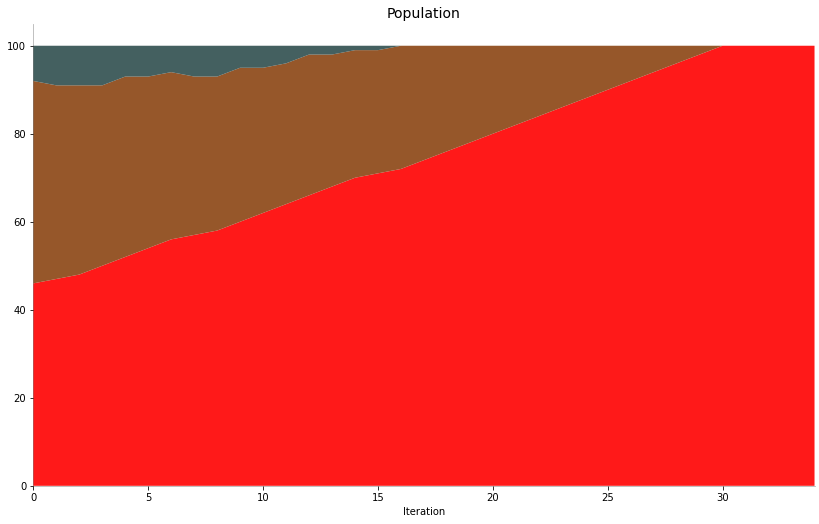 | ![](Images\Punto3\46bad_45mbad_9tittat_pop.png) | ![](Images\Punto3\legend2.png)

Here we have 17 players for each of the chosen strategies.

| | | Legend
:--------: | :-------: | :-:
![](Images\Point3\smarter.png) | ![](Images\Point3\smarter_pop.png) | ![](Images\Point3\legend2.png)

In the last graph we have 10 players for all of our strategies.


| | | Legend
:--------: | :-------: | :--: 
![](Images\Point3\200it_random.png)  | 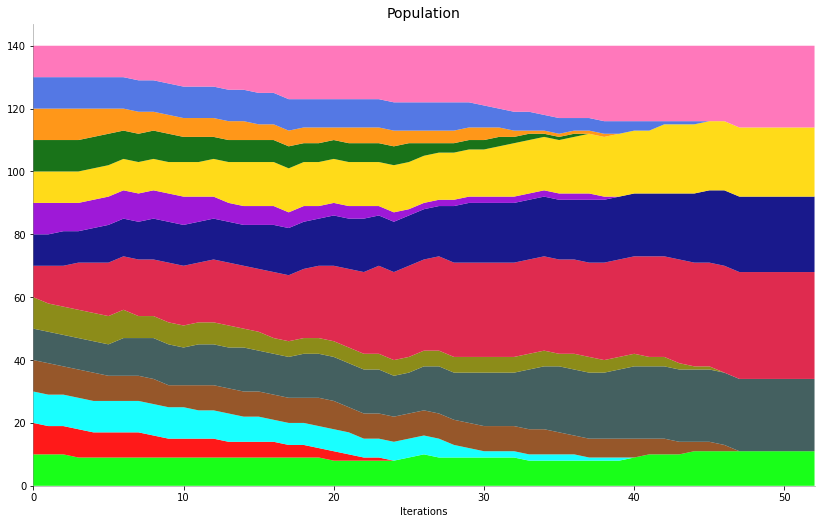 | <img src="Images\Point3\legend3.png"  width="200" height="500" />



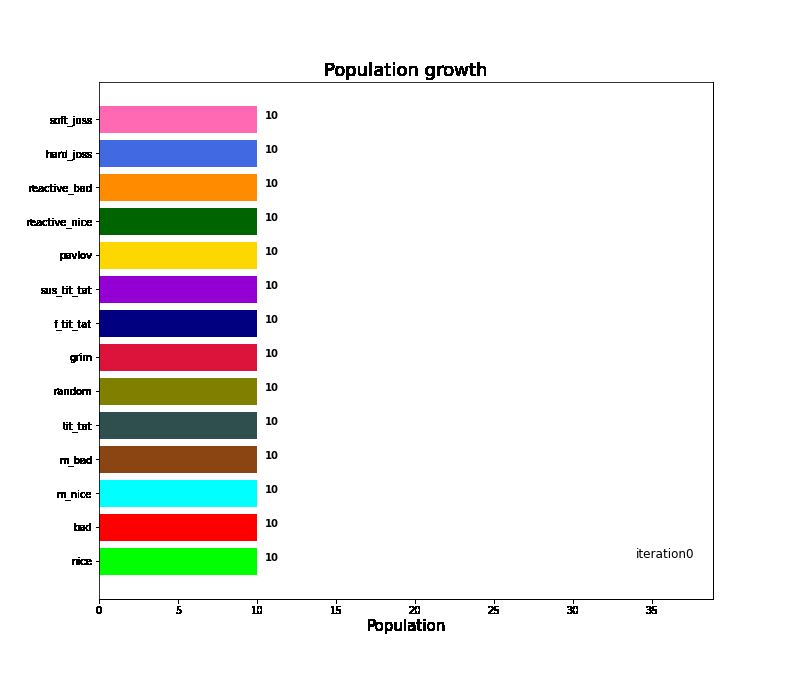

## Point 4: rMPIPD with mutations

In Point 4 we assume that along the tournament the stretegies are allowed to mutate. We assume the existence of a gene that encodes the attitude of an individual to cooperate and its genotype is represented by a probability which can randomly mutate at each iteration of the tournament.

For this task we have to modify our principal functions, adapting them to the mutation case. Furthermore we increase the dimensionality of `h` by adding a row containing the *cooperation gene* for every partecipant.

In order to manifest the partecipants gene phenotype we implement a function called `mutation`.

### Mutation function

This function allows a partecipant to collaborate with a certain probability, independently from what he should have done according to his strategy.

* It takes in **input** `player` *i.e.* the string corresponding to a strategy, `gene` that represents the player's probability and the same variables taken by the **strategies functions**.
* It **returns** [1,0] with a probability equal to `gene`, otherwise it returns the standard move of the considered strategy.

In [ ]:
def mutation(player,gene,it,u,v,u2):

    if npr.random() < gene:
        return [1,0]
    else:
        return strat[player](it,u,v,u2)

### Adapted tournament function

In this section we show the changes made to the `tournament` function as an example, for all the other functions the modifications are similar and won't be discussed in detail.
</br>The function has a new input parameter, `mutation_prob` *i.e.* the probability for every partecipant to develop a random mutation at each iteration of the tournament. This parameter needs to be passed to the update function, since the mutation may happen only when `h` is *repopulated*.</br>
Other significant additions are:
* vector `s_ref`, which saves all the starting and new strategies that take part in the tournement, to create a reference for the columns of the **poulation** and **score matrices**, since a mutated strategy needs to be considered as a completely new strategy
* a method to record which and how many strategies are created at each iteration, update `s_ref` and add that many new columns to matrices `val_matrix` and `n_matrix`
* a new slicing method for the sorting of the multidimensional **strategies array**

In [ ]:
def tournament(h,update_f,s,it=None,mutation_prob=None,n_change=None):
    
    if it == None: it = 100
    s_ref = [[i,0] for i in range(len(s))]

    if np.shape(h) != (len(h.T),):
        for i in range(len(h[1])):
            if h[1,i] != 0:
                check=0
                string = '{}_{}'.format(s[int(h[0,i])],int(h[1,i]*100))
                for val in s:
                    if val == string:
                        check = 1
                if check == 0:
                    s_ref.append(h[:,i])
                    s.append(string)

    new_strat = 0
    n_matrix = np.zeros([it,len(s)])                   #matrix of the number of strategies at each iteration
    val_matrix = np.zeros([it,len(s)])                 #matrix of the average scores at each iteration
    new_col = np.zeros((it,1))
    count = 0
    for i in range(it):    
        strategies, average_results, numbers = round_robin(h,s,ord=True)
        
        for j in range(new_strat):                     #adds a new column to n_matrix and val_matrix 
            n_matrix = np.hstack((n_matrix,new_col))   #for each new strategy born in the previous iteration
            val_matrix = np.hstack((val_matrix,new_col))

        numbers_1 = np.zeros(len(n_matrix.T))
        average_1 = np.zeros(len(n_matrix.T))

        if np.shape(h) == (len(h.T),):                 #NO mutations
            for j in range(len(strategies)):
                numbers_1[strategies[j]] = int(numbers[j])
                average_1[strategies[j]] = average_results[j]

        else:
            for j in range(len(strategies.T)):         #YES mutations
                for k in range(len(s_ref)):            #new slicing method adapted for 2-dim h
                    if np.all(s_ref[k] == strategies[:,j]):
                        ind = k
                numbers_1[ind] = int(numbers[j])
                average_1[ind] = average_results[j]

        n_matrix[i] = numbers_1
        val_matrix[i] = average_1
        
        if len(np.unique(average_results)) == 1:
            count+=1
            if count == 1: tresh = i
            if count == int(tresh/10) + 3:
                break

        h, new_strat = update[update_f](h,strategies,average_results,s,s_ref,mutation_prob,n_change)

    n_matrix1 = np.copy(n_matrix[:i,:])
    val_matrix1 = np.copy(val_matrix[:i,:])
    return n_matrix1, val_matrix1, i

### Simulations

The **graphics functions** have been updated as well to work with multidimensional `h`

In [ ]:
s = ['nice','bad','m_nice','m_bad','tit_tat',
    'random','grim','f_tit_tat','sus_tit_tat',
    'pavlov','reactive_nice','reactive_bad',
    'hard_joss','soft_joss']

n_players = 60
h = np.zeros((2,n_players))
h[0] = npr.randint(0,len(s),size=n_players)
unique, n_strategies = np.unique(h[0],return_counts=True)

for a,b in zip(unique,n_strategies): print(s[int(a)],b)

iterations = 100
n_ma4, val_ma4, iteration = pris_dil.tournament(h,'update_5',s,it=iterations,mutation_prob=0.05)
grf.graph_average(h,val_ma4,s,iteration,start_s=start_s)
grf.graph_population(n_ma4,iteration,s,start_s=start_s)

Prob. Mutation of 0.01 | Prob. Mutation of 0.05  
:-: | :-: 
![](Images\Point4\mut_01_pop.png) | ![](Images\Point4\mut_05_pop.png) 

| Prob. Mutation of 0.1
| :-:
| <img src="Images\Point4\mut_1_pop.png"  width="500" height="500" />

| | | Legend
:-: |  :-: | :-:
 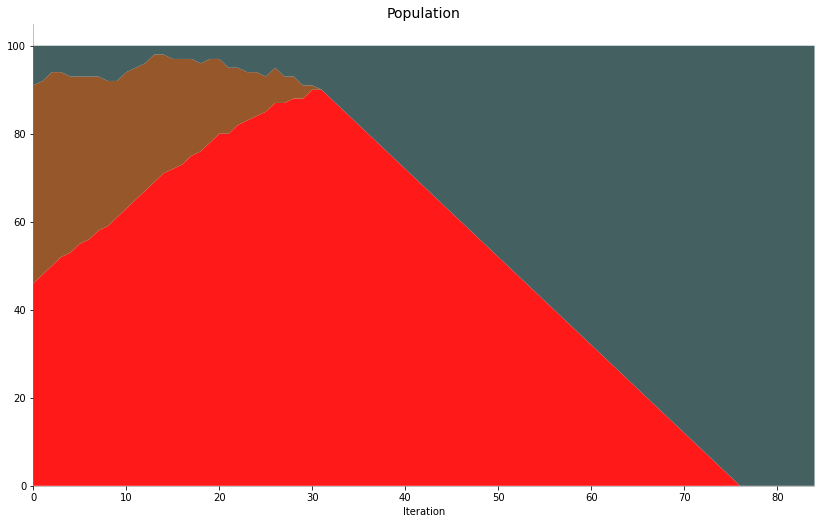| ![](Images\Point4\46b_45mb_9tt_w6b20_pop.png) | ![](Images\Point4\legend_1.png)
